# Tamaño de paso o factor de aprendizaje

**Learning rate schedule:** $\;$ secuencia de tamaños de paso $\{\eta_t\}$

## Tamaño de paso constante

**Tamaño de paso constante:** $\;$ es la opción más sencilla, $\quad\eta_t=\eta$

**Ejemplo:** $\qquad\boldsymbol{\theta}=(\theta_1,\theta_2)^t$ $\qquad\mathcal{L}(\boldsymbol{\theta})=0.5(\theta_1^2-\theta_2)^2+0.5(\theta_1-1)^2$

$\;\mathbf{\nabla}\mathcal{L}(\boldsymbol{\theta})=(2\theta_1(\theta_1^2-\theta_2)+\theta_1-1, \theta_2-\theta_1^2)^t$ $\qquad\boldsymbol{\theta}_0=\boldsymbol{0}$ $\qquad\eta_t=0.4$ $\qquad$ tolerancia $0.01$

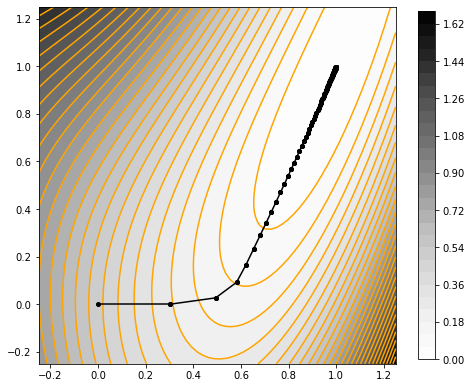

In [2]:
import numpy as np
import matplotlib.pyplot as plt
eta = 0.3 # <--- con otros valores no converge o lo hace muy lentamente
L = lambda t: 0.5 * np.square(np.square(t[0]) - t[1]) + 0.5 * np.square(t[0] - 1)
theta1, theta2 = np.meshgrid(np.linspace(-0.25, 1.25, num=64), np.linspace(-0.25, 1.25, num=64))
theta = np.squeeze(np.dstack([np.ravel(theta1), np.ravel(theta2)]))
Ltheta = np.apply_along_axis(L, 1, theta)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set(aspect='equal')
ax.contour(theta1, theta2, Ltheta.reshape(theta1.shape), 30, colors='orange')
cp = ax.contourf(theta1, theta2, Ltheta.reshape(theta1.shape), 30, cmap='Greys')
plt.colorbar(cp, ax=ax, shrink=0.8)
grad = lambda t: np.array([2 * t[0] * (np.square(t[0]) - t[1]) + t[0] - 1, t[1] - np.square(t[0])])
theta, tol, delta, t = np.zeros(2), 0.01, np.inf, 1
while np.max(np.abs(delta)) > tol and t < 100: # <--- número máximo de iteraciones
    oldtheta = np.copy(theta)
    theta = theta - eta * grad(theta)
    t = t + 1
    plt.plot([oldtheta[0], theta[0]], [oldtheta[1], theta[1]], 'o-k', markersize=4)

## Convergencia de descenso por gradiente

**En general:** $\;$ puede no converger si $\eta$ es muy grande, o hacerlo muy lentamente si es muy pequeño

**Objetivo cuadrático:** $\;$ si $\,\mathcal{L}(\boldsymbol{\theta})=\frac{1}{2}\boldsymbol{\theta}^t\mathbf{A}\boldsymbol{\theta}+\boldsymbol{b}^t\boldsymbol{\theta}+c,\,$ $\,\mathbf{A}\succeq\boldsymbol{0},\,$ converge si $\eta$ se acota según la pendiente más pronunciada, $\lambda_{\text{max}}(\mathbf{A}):$
$$\eta<\frac{2}{\lambda_{\text{max}}(\mathbf{A})}$$

**Gradiente Lipschitz con $L>0$:** $\;$ converge si $\eta<\frac{2}{L},\,$ pero $L$ suele ser desconocida 

## Búsqueda lineal

**Búsqueda lineal:** $\;$ halla el paso óptimo en la dirección escogida, $\,\eta_t=\operatorname*{argmin}\limits_{\eta>0}\;\phi_t(\eta)\,$ con $\,\phi_t(\eta)=\mathcal{L}(\boldsymbol{\theta}_t+\eta\boldsymbol{d}_t)$

**Búsqueda lineal exacta:** $\;$ si $\mathcal{L}$ es convexa, la búsqueda lineal puede resolverse analíticamente

**Ejemplo de búsqueda lineal exacta:** $\,\mathcal{L}(\boldsymbol{\theta})=\frac{1}{2}\boldsymbol{\theta}^t\mathbf{A}\boldsymbol{\theta}+\boldsymbol{b}^t\boldsymbol{\theta}+c$
$$\begin{align*}
\frac{d\phi(\eta)}{d\eta}&=\frac{d}{d\eta}\left[\frac{1}{2}(\boldsymbol{\theta}+\eta\boldsymbol{d})^t\mathbf{A}(\boldsymbol{\theta}+\eta\boldsymbol{d})+\boldsymbol{b}^t(\boldsymbol{\theta}+\eta\boldsymbol{d})+c\right]\\
&=\boldsymbol{d}^t\mathbf{A}(\boldsymbol{\theta}+\eta\boldsymbol{d})+\boldsymbol{d}^t\boldsymbol{b}\\
&=\boldsymbol{d}^t(\mathbf{A}\boldsymbol{\theta}+\boldsymbol{b})+\eta\boldsymbol{d}^t\mathbf{A}\boldsymbol{d}%
\overset{!}{=}0\to\eta=-\frac{\boldsymbol{d}^t(\mathbf{A}\boldsymbol{\theta}+\boldsymbol{b})}{\boldsymbol{d}^t\mathbf{A}\boldsymbol{d}}
\end{align*}$$


**Búsqueda lineal aproximada:** $\;$ emplea algún método eficiente que garantice una reducción suficiente del objetivo

**Método de backtracking Armijo:** $\;$ parte del $\eta$ actual o uno grande y lo reduce iterativamente mediante un factor $\beta\in(0, 1)$ hasta cumplir la **condición de Armijo-Goldstein**, $\,\mathcal{L}(\boldsymbol{\theta}_t+\eta\boldsymbol{d}_t)\leq\mathcal{L}(\boldsymbol{\theta}_t)+c\,\eta\,\boldsymbol{d}_t^t\,\boldsymbol{g}_t,\,$ donde $\,c\in(0,1)\,$ es una constante, típicamente $c=10^{-4}$